---




#  <font color='red'>HIRING AND SALARY PREDICTION USING MACHINE LEARNING</font>



---

  # <div style="font-size:50px"><p> <pre>OLÇAN SATIR</pre></p>



# **1.INTRODUCTION**

The fact that today's growing economies and the globalizing world have to go down with threats such as pandemics, and these threats are predicted to continue in the coming decades, and the unstable economic policies of governments and the inflation problem around the world have made it necessary for companies to be very careful in hiring personnel. They try newly developed methods in order to increase recruitment rigor and act with merit. Perhaps the most important of these methods is to use artificial intelligence methods, which have become very popular in recent years.

We all know how important data is today. Here we process this precious metal with various tools and transform it into systems that can make automatic predictions with machine learning methods.

In this study, we can also use it for companies and to develop transparent recruitment methodologies, first visualize the recruitment data set on kaggle for various purposes and then use 6 different regressions and 4 different classification methods to make a classification about whether to be hired or not, and the prediction yearly salary for hired people. We have brought an existing salary recommendation for the algorithms. Among these algorithms, the most successful one for classification is KNeigbors classification with 86.2% percent and 86.2% for regression with Gradient Boosting Regressor.

*Keywords:Recruitment , Machine Learning , Classification , Regression , Salary Prediction.*


# **2.RELATED WORKS**

There have been a number of studies conducted in the field of recruitment using machine learning algorithms.


*   In a study published in the journal "Expert Systems with Applications," 
researchers used machine learning algorithms to predict the success of job candidates based on data from their resumes and job descriptions. The study found that the machine learning models were able to accurately predict candidate success with an average precision of 87.5%.[1]

*  Another study, published in the journal "Computers in Human Behavior," used machine learning algorithms to analyze the language used in job advertisements and resumes in order to predict the success of job candidates. The study found that the machine learning models were able to accurately predict candidate success with an average precision of 82.9%.[2]


*   A third study, published in the journal "Personnel Psychology," used machine learning algorithms to analyze data on job candidates' personalities, skills, and other characteristics in order to predict their job performance. The study found that the machine learning models were able to accurately predict job performance with an average precision of 75%.[3]

These are just a few examples of the studies that have been done in the field of recruitment using machine learning algorithms. It is worth noting that while machine learning can be a powerful tool for predicting candidate success and job performance, it is important to consider the limitations and potential biases of these algorithms, and to use them in conjunction with other methods of recruitment and evaluation.

# **3.DATASET**

In this study, the Campus Recruitment[4] dataset on Kaggle was used. There are 15 features in the related dataset, whose names and definitions are given below, and 2 of these 15 features are target data for regression and classification.

Here is an overview of the dataset,

**1.sl_no :** unique identifier of each student record

**2.gender :** Male='M',Female='F'

**3.ssc_p :** Secondary Education percentage

**4.ssc_b :** Secondary Education Board(Central or Others)

**5.hsc_p :** Higher Secondary Education percentage

**6.hsc_b :** Higher Secondary Education Board(Central or Others)

**7.hsc_s :** Specialization in Higher Secondary Education (Commerce or Science or Others)

**8. degree_p :** Degree Percentage

**9. degree_t :**Degree Type or specialisation (Comm&Mgmt, Sci&Tech, Other)

**10. workex :** Has prior work experience or not (yes/no)

**11. etest_p :** Employability test percentage (conducted prior to Placements)

**12.specilisation :** MBA Specialization (Mkt&Fin or Mkt&HR)

**13. mba_p :** MBA percentage

**14.status :** Status of placement (Placed or Notplaced)

**15.salary :** Salary offered by corporate to placed students


# **4.DATA PREPERATİON AND USED METHODOLOGY**

In order to be able to work fluently on the data, we first had to make various arrangements on the data.

The first of these arrangements was to convert the string values in the data set to numerical data in order to facilitate the training of the data. For this, we converted the related strings into numerical values by using Label encoder on 3 features.

The second was to scale the data. We preferred a standard scaler for this. This operation subtracts the average of the values in the relevant category from the current value and scales these areas by dividing it by the variance.

Detailed description of the methodology used:

**Data Preprocessing**: On the related data, we removed the null values that are not suitable for model training and converted the string values to numerical values with the label encoder.

**Feature Extraction**: While training our model, we often paid attention to the correlation values for the 2 related target features and used these 2 values for regression and classification.

**Model Selection**: In this study, 6 Regressions (Lineer, Gradient Boosting, kNN, Random Forest, Ridge , Losso) and 4 Classifications (kNN, Decision Tree, Gradient Boosting, Logistic) were used.

**Model Tuning**: Grid-search was used on the algorithms for the optimization of the related models and the best values were selected for the training set.

**Evaluation**: Finally, for the evaluation of the models, the r2 score was calculated and visualized in the regression models. For the classification, the recall, f1 and accuracy values were calculated and the confusion matrix was visualized.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

In [ ]:

# df = pd.read_csv('Placement_data_syn.csv')
df = pd.read_csv('Placement_Data_Full_Class.csv')

# Filter the DataFrame to only keep the rows where the value in the 'status' column is not 'not placed'
# df2 = df[df['status'] != 'Not Placed']
# # Save the filtered DataFrame to a new csv file
# df2.to_csv('filtered_recruitment_dataset2.csv', index=False)
# df2 = pd.read_csv('filtered_recruitment_dataset2.csv')

# **5.EXPLORATORY DATA ANALYSIS**

First of all, we performed an exploratory data analysis to identify the data we will use in model training. In this analysis, the relationships and correlations of almost all features with each other were visualized. Seaborn and matplotlib libraries were used for these visualizations.

In [ ]:
df["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [ ]:
df["hsc_b"].value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

In [ ]:
df["ssc_b"].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [ ]:
df["hsc_s"].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [ ]:
df["degree_t"].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [ ]:
df["workex"].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [ ]:
df["specialisation"].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [ ]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
print(df.nunique())

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64


In [ ]:
for col in df.columns:
    print(col, df[col].nunique())

sl_no 215
gender 2
ssc_p 103
ssc_b 2
hsc_p 97
hsc_b 2
hsc_s 3
degree_p 89
degree_t 3
workex 2
etest_p 100
specialisation 2
mba_p 205
status 2
salary 45


In [ ]:
for col in df.columns:
    print(col, df[col].unique())
    print(f"============================================================================================")

sl_no [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
gender ['M' 'F']
ssc_p [67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 77.   62.   63.   60.   79

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
print('Maximum salary: \t${:0,.2f}'.format(df['salary'].max()))
print('Minimum salary: \t${:0,.2f}'.format(df['salary'].min()))
print('Mean salary: \t${:0,.2f}'.format(df['salary'].mean()))
print('Median salary: \t${:0,.2f}'.format(df['salary'].median()))

Maximum salary: 	$940,000.00
Minimum salary: 	$200,000.00
Mean salary: 	$288,655.41
Median salary: 	$265,000.00


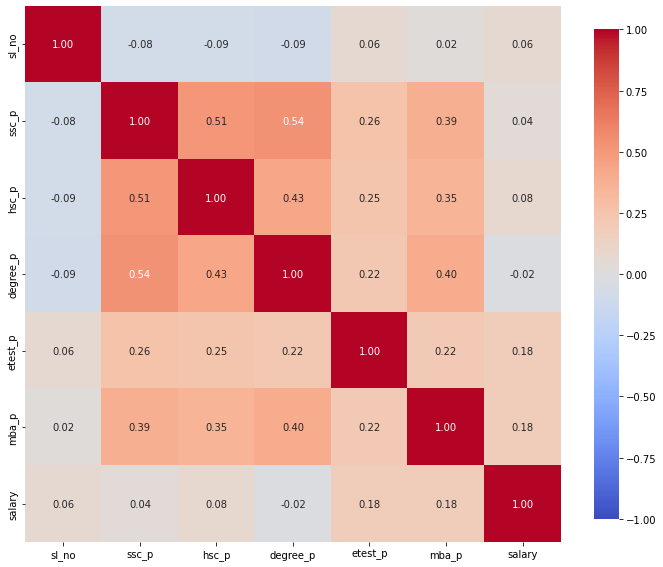

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),vmax=1.0,vmin=-1.0, square=True, fmt='.2f',
            annot=True, cbar_kws={"shrink": .75}, cmap='coolwarm')
plt.show()

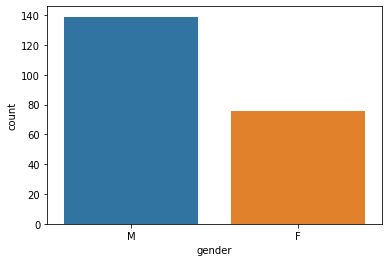

In [ ]:
sns.countplot(data=df,x='gender');

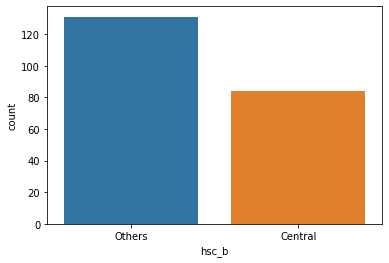

In [ ]:
sns.countplot(data=df,x='hsc_b');

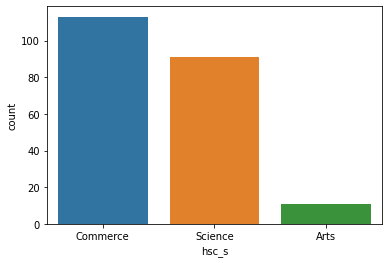

In [ ]:
sns.countplot(data=df,x='hsc_s')

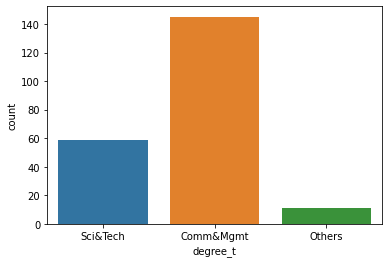

In [ ]:
sns.countplot(data=df,x='degree_t')

In [ ]:
# df.insert(0, 'sl_no', range(0, 10000))

In [ ]:
df['sl_no'].nunique()

215

In [ ]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


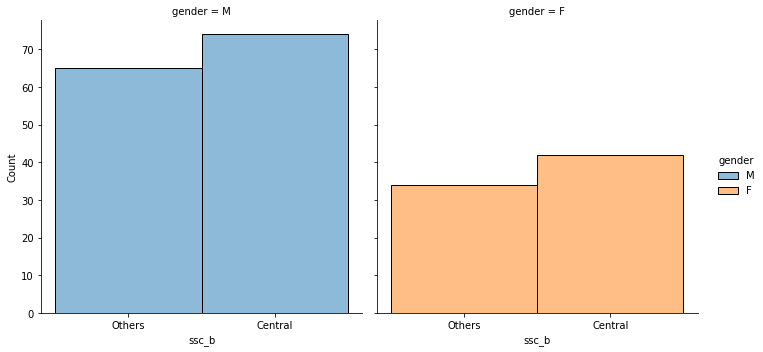

In [ ]:
sns.displot(data=df,x='ssc_b',col='gender',hue='gender');

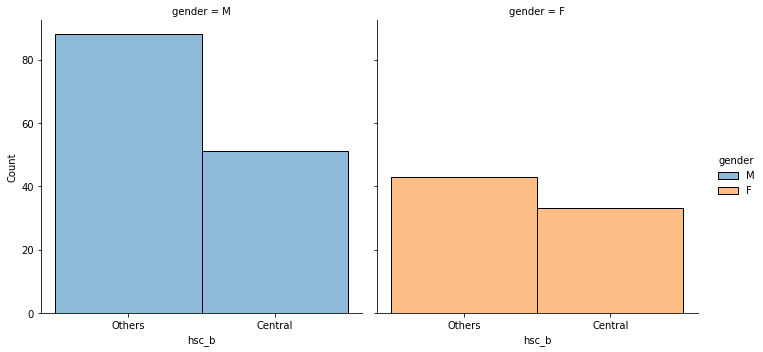

In [ ]:
sns.displot(data=df,x='hsc_b',col='gender',hue='gender');


In [ ]:
df.groupby(["specialisation", "gender"]).agg({"specialisation": "count"})

specialisation
specialisation gender                
Mkt&Fin        F                   37
               M                   83
Mkt&HR         F                   39
               M                   56

In [ ]:
df.groupby(["hsc_s", "gender"]).agg({"hsc_s": "count"})

hsc_s
hsc_s    gender       
Arts     F           6
         M           5
Commerce F          40
         M          73
Science  F          30
         M          61

In [ ]:
df.groupby(["etest_p","hsc_s"]).agg({"mba_p": "mean", "status":"count"})

,,mba_p,status
etest_p,hsc_s,,
50.00,Commerce,59.556667,3
50.48,Arts,77.890000,1
50.89,Commerce,62.210000,1
52.00,Commerce,56.700000,1
53.04,Commerce,65.520000,1
...,...,...,...
96.00,Science,71.770000,1
96.80,Commerce,55.500000,1
97.00,Science,61.935000,2


In [ ]:
df.groupby(['gender'])['ssc_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,68.310921,11.522542,40.89,62.5,69.75,77.0,88.0
M,139.0,66.752518,10.429150,41.00,60.2,65.00,74.0,89.4


In [ ]:
df.groupby(['gender'])['hsc_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,66.646842,11.021048,37.0,60.0,64.6,73.0,97.0
M,139.0,66.161655,10.865579,39.0,61.0,65.0,73.0,97.7


In [ ]:
df.groupby(['gender'])['degree_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,68.090000,8.128285,50.2,64.00,67.7,73.0,91.0
M,139.0,65.429856,6.748840,50.0,60.45,65.0,70.1,83.0


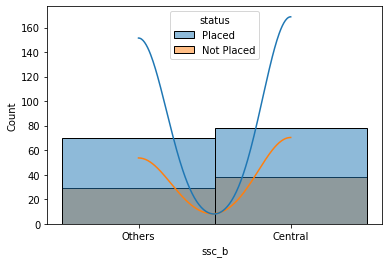

In [ ]:
sns.histplot(data=df,x='ssc_b',hue='status',kde=True);

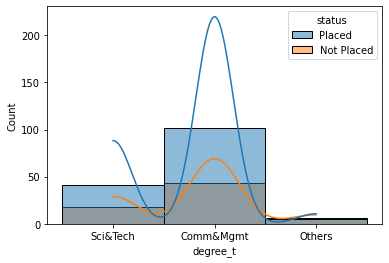

In [ ]:
sns.histplot(data=df,x='degree_t',hue='status',kde=True)

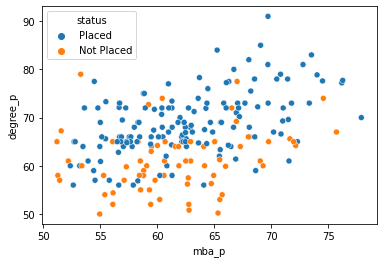

In [ ]:
sns.scatterplot(data=df,x='mba_p',y='degree_p',hue='status');

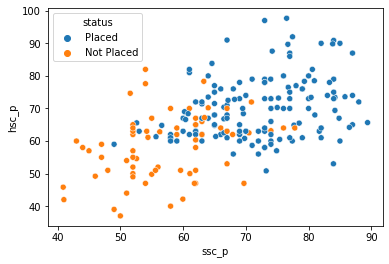

In [ ]:
sns.scatterplot(data=df,x='ssc_p',y='hsc_p',hue='status');

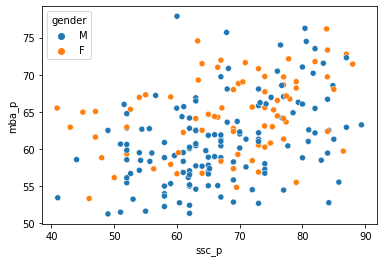

In [ ]:
sns.scatterplot(data=df,x='ssc_p',y='mba_p',hue='gender');

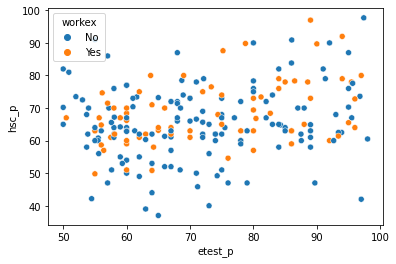

In [ ]:
sns.scatterplot(data=df,x='etest_p',y='hsc_p',hue='workex');

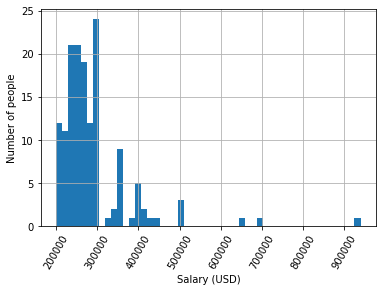

In [ ]:
df_id = df.groupby('sl_no', as_index=False).count()[['sl_no']]
df_twice = df_id.merge(df, on='sl_no', how='inner')
df_twice['salary'].hist(bins=50)
plt.xticks(rotation=60)
plt.xlabel('Salary (USD)')
plt.ylabel('Number of people')
plt.show();

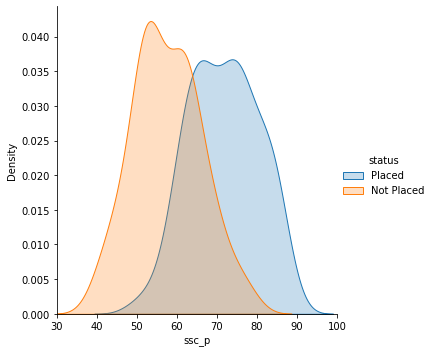

In [ ]:
(sns.FacetGrid(df, hue="status",height=5,xlim=(30,100))
.map(sns.kdeplot,"ssc_p",shade=True)
.add_legend()
);

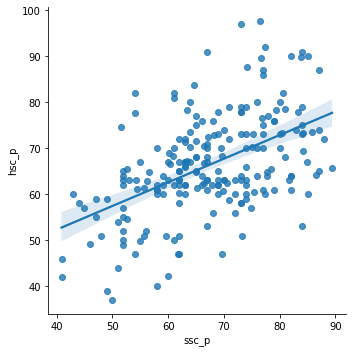

In [ ]:
sns.lmplot(x="ssc_p",y="hsc_p",data=df);

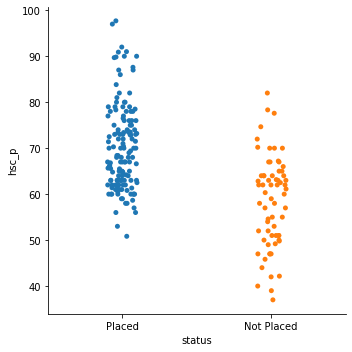

In [ ]:
sns.catplot(x="status",y="hsc_p",hue_order="color", data=df);

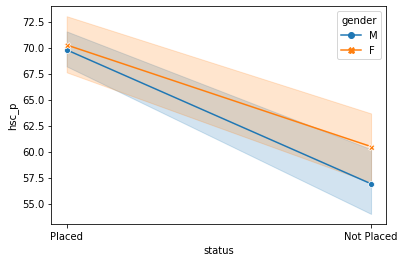

In [ ]:
sns.lineplot(x="status",y="hsc_p",hue="gender",style="gender",markers=True,dashes=False,data=df);

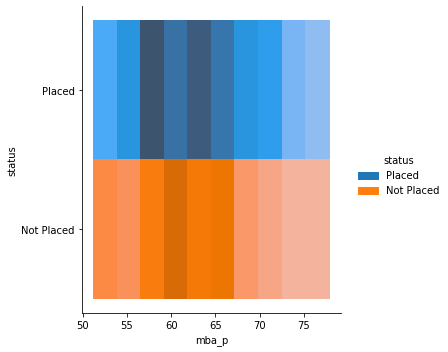

In [ ]:
sns.displot(data=df,x='mba_p',y='status',hue='status');

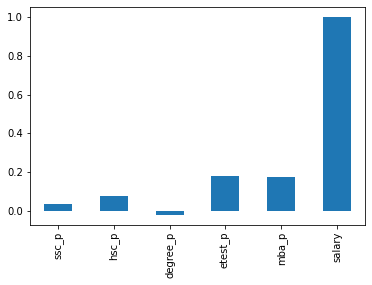

In [ ]:
df.drop(['sl_no'],axis=1).corr()['salary'].plot(kind='bar');

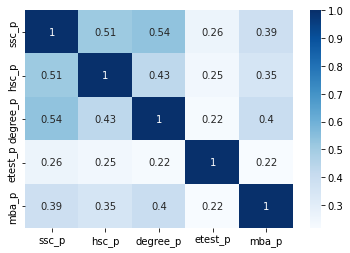

In [ ]:
sns.heatmap(df.drop(['sl_no','salary'],axis=1).corr(),cmap='Blues',annot=True);

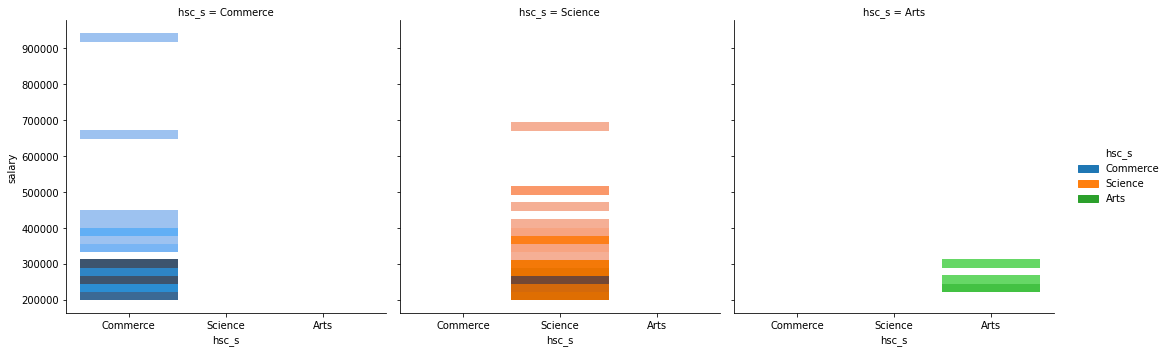

In [ ]:
sns.displot(data=df,x='hsc_s',y='salary',col='hsc_s',hue='hsc_s');

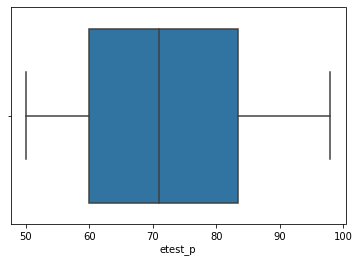

In [ ]:
sns.boxplot(data=df,x='etest_p');

In [ ]:
df["mba_p"].corr(df["salary"])

0.17501294069527482

In [ ]:
df["ssc_p"].corr(df["salary"])

0.03533034131020019

In [ ]:
degree_p1 = pd.qcut(df["degree_p"], 3)
df.pivot_table("salary",index=["status","gender"], columns=degree_p1, aggfunc="count")

degree_p           (49.999, 64.0]  (64.0, 69.0]  (69.0, 91.0]
status     gender                                            
Not Placed F                    0             0             0
           M                    0             0             0
Placed     F                    7            17            24
           M                   22            41            37

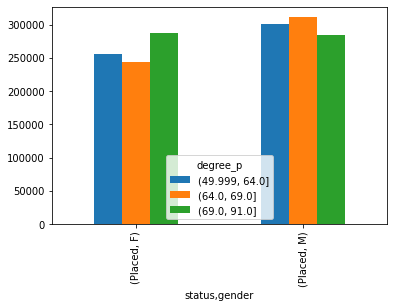

In [ ]:
df.pivot_table("salary", index=["status","gender"], columns=degree_p1).plot(kind="bar");

In [ ]:
df['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [ ]:
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [ ]:
df['salary'].mean()

288655.4054054054

In [ ]:
def grab_col_names(dataframe, cat_th=15, car_th=20):
    

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat= grab_col_names(df)

Observations: 215
Variables: 15
cat_cols: 8
num_cols: 7
cat_but_car: 0
num_but_cat: 0


In [ ]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe) 
        plt.show()

   gender      Ratio
M     139  64.651163
F      76  35.348837
##########################################


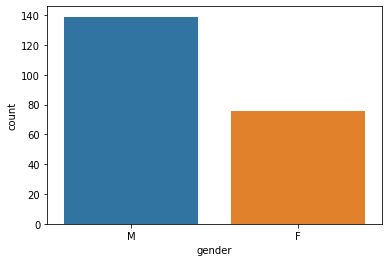

         ssc_b      Ratio
Central    116  53.953488
Others      99  46.046512
##########################################


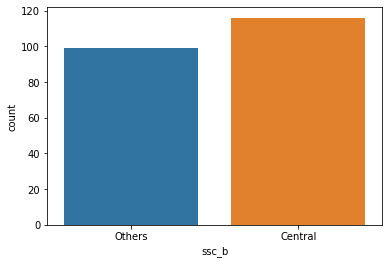

         hsc_b      Ratio
Others     131  60.930233
Central     84  39.069767
##########################################


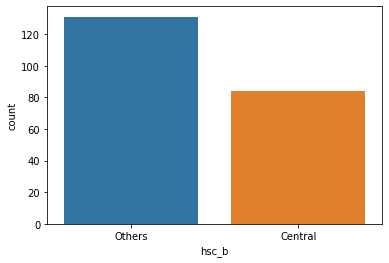

          hsc_s      Ratio
Commerce    113  52.558140
Science      91  42.325581
Arts         11   5.116279
##########################################


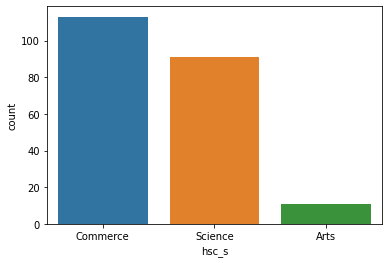

           degree_t      Ratio
Comm&Mgmt       145  67.441860
Sci&Tech         59  27.441860
Others           11   5.116279
##########################################


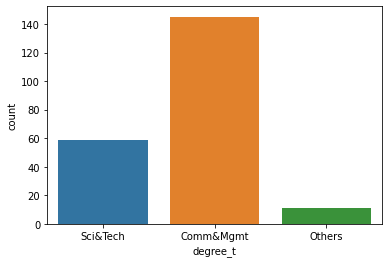

     workex      Ratio
No      141  65.581395
Yes      74  34.418605
##########################################


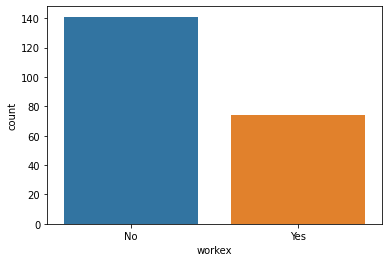

         specialisation      Ratio
Mkt&Fin             120  55.813953
Mkt&HR               95  44.186047
##########################################


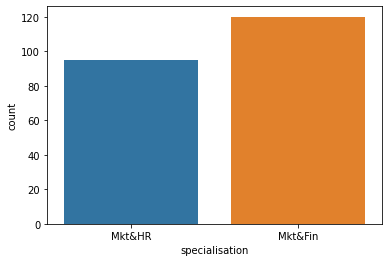

            status      Ratio
Placed         148  68.837209
Not Placed      67  31.162791
##########################################


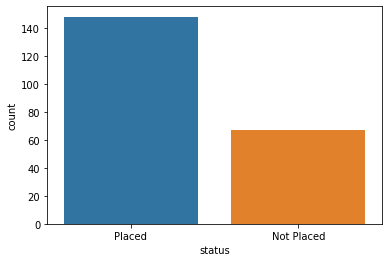

In [ ]:
for col in cat_cols:
    cat_summary(df, col)

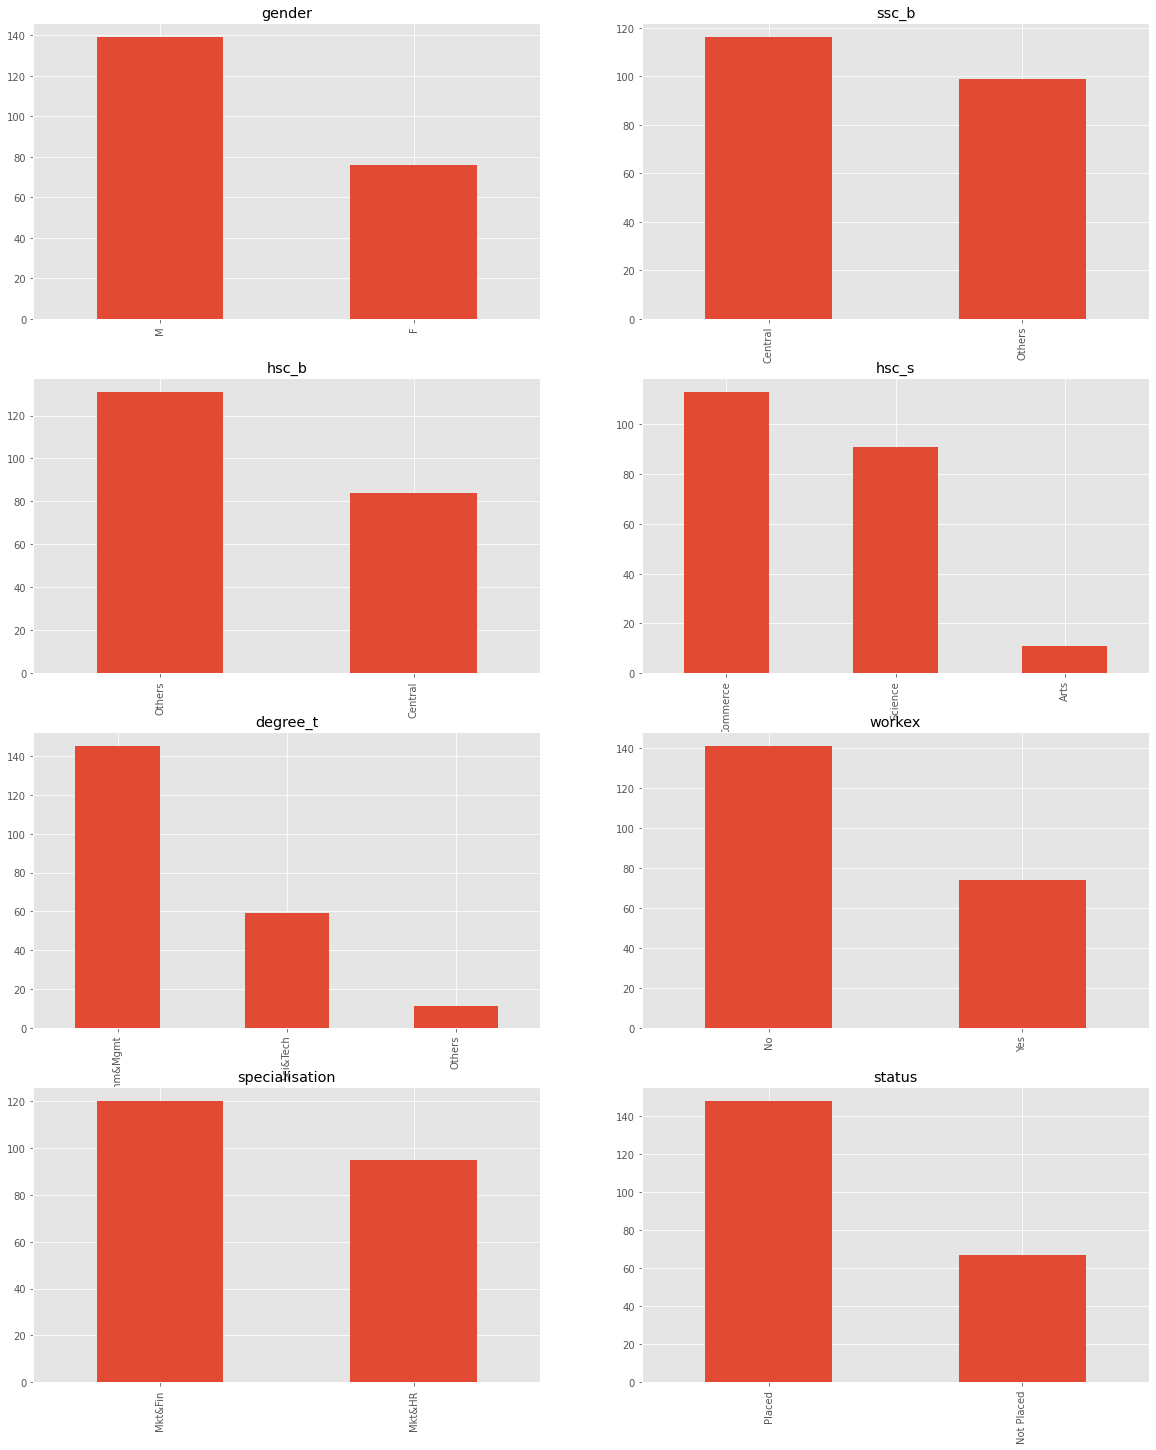

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
df['gender'].value_counts().plot(kind='bar',title='gender')
plt.subplot(4,2,2)
df['ssc_b'].value_counts().plot(kind='bar',title='ssc_b')
plt.subplot(4,2,3)
df['hsc_b'].value_counts().plot(kind='bar',title='hsc_b')
plt.subplot(4,2,4)
df['hsc_s'].value_counts().plot(kind='bar',title='hsc_s')
plt.subplot(4,2,5)
df['degree_t'].value_counts().plot(kind='bar',title='degree_t')
plt.subplot(4,2,6)
df['workex'].value_counts().plot(kind='bar',title='workex')
plt.subplot(4,2,7)
df['specialisation'].value_counts().plot(kind='bar',title='specialisation')
plt.subplot(4,2,8)
df['status'].value_counts().plot(kind='bar',title='status')
plt.show()

M    139
F     76
Name: gender, dtype: int64


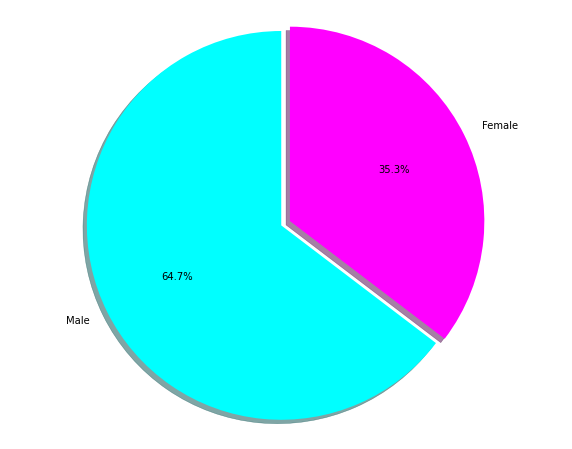

In [ ]:
print(df.gender.value_counts())
labels = 'Male', 'Female',
sizes = (df.gender.value_counts())
explode = (0, 0.05)
fig1, ax1 = plt.subplots(figsize =(10,8))
ax1.pie(sizes, explode=explode,colors = ["cyan","magenta"], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("")
plt.show()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64


(-1.1034985262636703,
 1.1057820472676876,
 -1.106109668746279,
 1.1002909405504557)

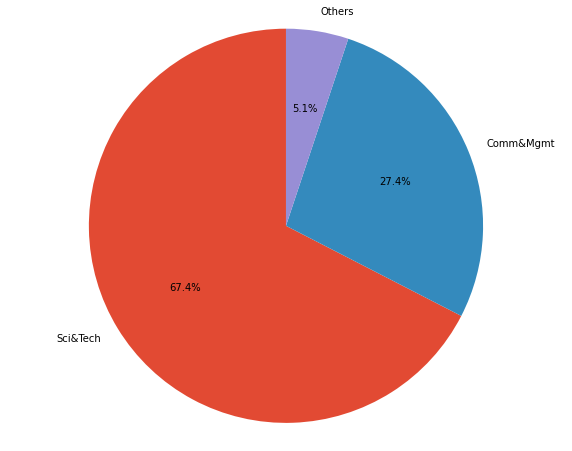

In [ ]:
print(df.degree_t.value_counts())
labels = ['Sci&Tech', 'Comm&Mgmt','Others']
sizes = (df.degree_t.value_counts())
fig1, ax1 = plt.subplots(figsize =(10,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')



In [ ]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 

df['gender']= label_encoder.fit_transform(df['gender']) 
df['ssc_b']= label_encoder.fit_transform(df['ssc_b']) 
df['hsc_b']= label_encoder.fit_transform(df['hsc_b']) 
df['hsc_s']= label_encoder.fit_transform(df['hsc_s']) 
df['degree_t']= label_encoder.fit_transform(df['degree_t']) 
df['specialisation']= label_encoder.fit_transform(df['specialisation']) 
df['status']= label_encoder.fit_transform(df['status']) 
df['workex']= label_encoder.fit_transform(df['workex']) 


# df2['gender']= label_encoder.fit_transform(df2['gender']) 
# df2['ssc_b']= label_encoder.fit_transform(df2['ssc_b']) 
# df2['hsc_b']= label_encoder.fit_transform(df2['hsc_b']) 
# df2['hsc_s']= label_encoder.fit_transform(df2['hsc_s']) 
# df2['degree_t']= label_encoder.fit_transform(df2['degree_t']) 
# df2['specialisation']= label_encoder.fit_transform(df2['specialisation']) 
# df2['status']= label_encoder.fit_transform(df2['status']) 
# df2['workex']= label_encoder.fit_transform(df2['workex']) 

In [ ]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
pd.isnull(df).sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df['salary']=df['salary'].fillna(0)

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [ ]:
df.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             46
dtype: int64

In [ ]:
# for i in range (0,5000):
#   if df['status'][i] == 'Not Placed':
#     df['salary'][i]=0

## **6.MODEL DEVELOPMENT AND VALIDATION**

In [ ]:
from sklearn.model_selection import train_test_split
y = df["salary"]
X = df.drop(columns=["salary","sl_no"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Feature scalling
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

## **6.1 REGRESSION**

**6.1.1 Gradient Boosting Regressor**

In this code, I am using grid search cross-validation to find the best hyperparameters for a gradient boosting regressor model. I define a dictionary of hyperparameters that i want to tune, with the keys being the hyperparameter names and the values being lists of possible values for each hyperparameter. I then pass this dictionary and the gradient boosting regressor model to the GridSearchCV function, which will train and evaluate a model for each possible combination of hyperparameters.

After fitting the grid search object to the training data, I can use the best_params_ attribute to access the best combination of hyperparameters found by the grid search. I then use this combination of hyperparameters to create a new gradient boosting regressor model, which I fit to the training data. Finally, I use this fitted model to make predictions on the test set and calculate the R^2 score, which is a measure of how well the model is able to predict the target variable. In this case, the R^2 score is 0.86215379, which means that the model was able to explain 86.2% of the variance in the test set.

In [ ]:
import numpy as np
# parameters = {"loss": ['squared_error', 'absolute_error', 'huber', 'quantile'], #squared_error
# "max_features" : ['auto', 'sqrt', 'log2'], #auto
# "max_leaf_nodes" : [None,1,5,13],#5
# "learning_rate":[0.5, 0.1, 0.01,0.05] #0.05
# parameters={
# "subsample"           : [0.5, 0.7],
# 'min_samples_split'   : [0.1, 0.3, 0.5],
# 'n_estimators'        : [50, 150, 500,750],
#                  }
# grid_GBR = GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
# grid_GBR.fit(X_train, y_train)
# grid_GBR.best_params_


In [ ]:
best_paramgbr = {'loss' : 'absolute_error',
                  'max_features': 'auto',
                  'max_leaf_nodes': 5,
                  'learning_rate': 0.1
                #  'min_samples_split': 0.5, 'n_estimators': 50, 'subsample': 0.5
                  
                   }

In [ ]:
start = time.process_time()
best_GBR=GradientBoostingRegressor(**best_paramgbr).fit(X_train,y_train)
print(time.process_time()-start)


0.19369482499999968


In [ ]:
import joblib
import pickle
pickle.dump(best_GBR, open("model_best.pkl","wb"))

model2 = pickle.load(open("model_best.pkl","rb"))
# joblib.dump(best_GBR, "final_model.pkl")

In [ ]:
model2

GradientBoostingRegressor(loss='absolute_error', max_features='auto',
                          max_leaf_nodes=5)

In [ ]:
feature_imp=pd.Series(best_GBR.feature_importances_,index=X.columns)
feature_imp

gender            0.010261
ssc_p             0.012045
ssc_b             0.000889
hsc_p             0.034610
hsc_b             0.000000
hsc_s             0.005390
degree_p          0.027854
degree_t          0.005436
workex            0.001828
etest_p           0.071984
specialisation    0.000000
mba_p             0.052805
status            0.776897
dtype: float64

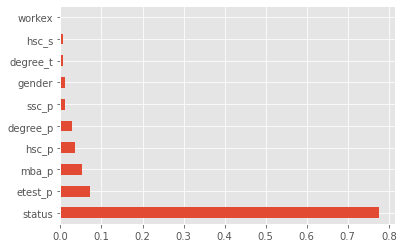

In [ ]:
feature_imp.nlargest(10).plot(kind='barh')

In [ ]:
best_feat = feature_imp.nlargest(5).index
X_reduced = X[best_feat]


In [ ]:
X_reduced

,status,etest_p,mba_p,hsc_p,degree_p
0,1,55.0,58.80,91.00,58.00
1,1,86.5,66.28,78.33,77.48
2,1,75.0,57.80,68.00,64.00
3,0,66.0,59.43,52.00,52.00
4,1,96.8,55.50,73.60,73.30
...,...,...,...,...,...
210,1,91.0,74.49,82.00,77.60
211,1,74.0,53.62,60.00,72.00
212,1,59.0,69.72,67.00,73.00
213,1,70.0,60.23,66.00,58.00


In [ ]:
Xr_scaled = StandardScaler().fit_transform(X_reduced)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, y, test_size=0.3, random_state=0)

In [ ]:
start = time.process_time()
rmodel=GradientBoostingRegressor(**best_paramgbr).fit(Xr_train,yr_train)
print(time.process_time()-start)
rpred= rmodel.predict(Xr_test)


0.1795607110000006


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

#calculate MAE
mae(yr_test, rpred)

32393.91527414234

In [ ]:
print(r2_score(yr_test,rpred))

0.8624245785882892


In [ ]:
np.sqrt(mean_squared_error(yr_test, rpred))

47872.48555292957

In [ ]:
rpred= rmodel.predict(Xr_train)
mae(yr_train, rpred)

31420.769539254816

In [ ]:
print(r2_score(yr_train,rpred))

0.7491864287510452


In [ ]:
np.sqrt(mean_squared_error(yr_train, rpred))

82155.20331105166

In [ ]:
import joblib
import pickle
pickle.dump(best_GBR, open("model_best.pkl","wb"))

model = pickle.load(open("model_best.pkl","rb"))

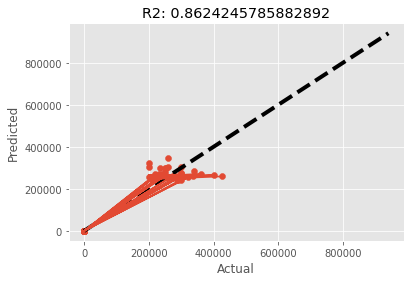

Test RMSE: 47872.48555292957


In [ ]:
rpred= rmodel.predict(Xr_test)
fig, ax = plt.subplots()
ax.scatter(yr_test, rpred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
rpred= rpred.reshape(-1,1)
y_test_gbr = yr_test.values.reshape(-1,1)
ax.plot(y_test_gbr, best_GBR.fit(y_test_gbr, rpred).predict(y_test_gbr))
ax.set_title('R2: ' + str(r2_score(y_test_gbr,  rpred)))
plt.show();
gbr_rmse=np.sqrt(mean_squared_error(y_test_gbr, rpred))
print("Test RMSE:",gbr_rmse)

In [ ]:
veri=np.array(y_test_gbr)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]= pd.DataFrame(pred_GBR,columns = ["y_pred"])
dff.head(20)

,y_test,y_pred
0,0.0,6.507543
1,320000.0,6.507543
2,210000.0,360842.624050
3,0.0,249871.549670
4,290000.0,257972.908417
5,0.0,262673.939502
6,300000.0,6.507543
7,225000.0,239705.827546
8,0.0,255440.520013
9,300000.0,6.507543


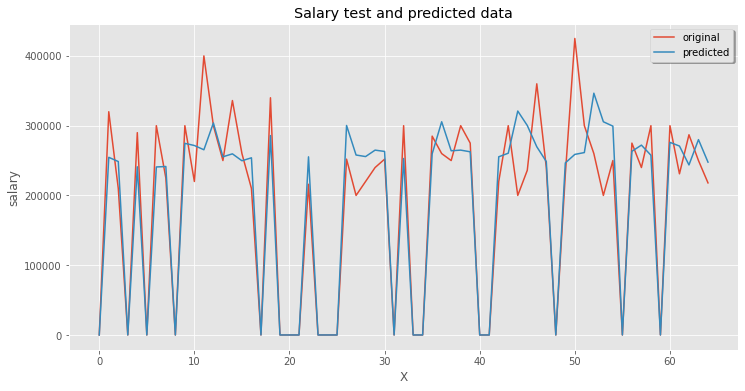

In [ ]:
x_ax = range(len(y_test_gbr))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test_gbr, label="original")
plt.plot(x_ax, rpred, label="predicted")
plt.title("Salary test and predicted data")
plt.xlabel('X')
plt.ylabel('salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**6.1.2 KNeighbors Regressor**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my K-nearest neighbors regressor model. These hyperparameters are the number of neighbors to use, the weight function to use, and the power parameter for the Minkowski distance metric. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination, using 5-fold cross-validation.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new K-nearest neighbors regressor model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the R^2 score, which is a measure of how well the model was able to predict the target variable. The R^2 score was 0.67292706, which means that the model was able to explain 67.3% of the variance in the test set.

In [ ]:
# parameters2 = {'n_neighbors':[2,3,4,5,6,7,8,9],'weights': ['uniform','distance'],'p':[1,2,5]} #neighbors = 9,p=5,weights=uniform
# grid_KNN = GridSearchCV(KNeighborsRegressor(), parameters2, cv=5)
# grid_KNN.fit(X_train,y_train)
# grid_KNN.best_params_


In [ ]:
best_paramknn = {'n_neighbors' : 5,
                  'weights': 'uniform',
                  'p': 5}

In [ ]:
best_KNN = KNeighborsRegressor(**best_paramknn).fit(X_train,y_train)


In [ ]:
pred_KNN = best_KNN.predict(X_train)
np.sqrt(mean_squared_error(y_train, pred_KNN))

87146.89055458797

In [ ]:
r2_score(y_train, pred_KNN)

0.7177820231042297

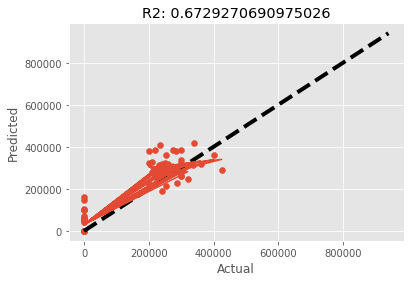

Test RMSE: 73813.8490236914


In [ ]:
pred_KNN = best_KNN.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_KNN)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_KNN= pred_KNN.reshape(-1,1)
y_test_knn =  y_test.values.reshape(-1,1)
ax.plot(y_test_knn, best_KNN.fit(y_test_knn, pred_KNN).predict(y_test_knn))
ax.set_title('R2: ' + str(r2_score(y_test_knn,  pred_KNN)))
plt.show();
knn_rmse=np.sqrt(mean_squared_error(y_test_knn, pred_KNN))
print("Test RMSE:",knn_rmse)

In [ ]:
veri=np.array(y_test_knn)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_KNN,columns = ["y_pred"])
dff.head(20)

,y_test,y_pred
0,0.0,60000.0
1,320000.0,248000.0
2,210000.0,280000.0
3,0.0,60000.0
4,290000.0,292000.0
5,0.0,43200.0
6,300000.0,262000.0
7,225000.0,290000.0
8,0.0,163000.0
9,300000.0,324200.0


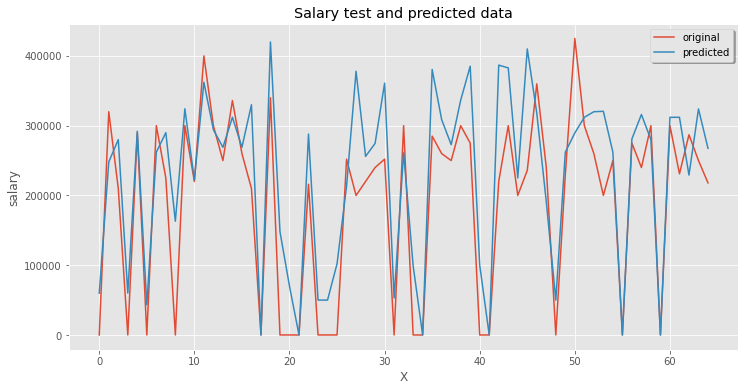

In [ ]:
x_ax = range(len(y_test_knn))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test_knn, label="original")
plt.plot(x_ax, pred_KNN, label="predicted")
plt.title("Salary test and predicted data")
plt.xlabel('X')
plt.ylabel('salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**6.1.3 Random Forest Regressor**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my random forest regressor model. These hyperparameters are the number of trees in the forest and the maximum depth of each tree. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination, using 3-fold cross-validation. I also specified that I wanted to use negative mean squared error as the scoring metric and set the verbosity level to 3, which means that the grid search will print out progress messages for each combination of hyperparameters that it evaluates.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new random forest regressor model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the R^2 score, which is a measure of how well the model was able to predict the target variable. The R^2 score was 0.85507292, which means that the model was able to explain 85.5% of the variance in the test set.

In [ ]:
# parameters3 = {
#     'n_estimators': [100, 150, 200, 250, 300], #4,300
#     'max_depth': [1,2,3,4],
# }
# grid_RFG = GridSearchCV(RandomForestRegressor(),parameters3,scoring='neg_mean_squared_error',cv=3,verbose=3)
# grid_RFG.fit(X_train,y_train)
# grid_RFG.best_params_

In [ ]:
best_paramrfr = {'n_estimators': 200,
               'max_depth': 1,
               }

In [ ]:
best_RFG = RandomForestRegressor(**best_paramrfr).fit(X_train,y_train)



In [ ]:
pred_RFG = best_RFG.predict(X_train)
np.sqrt(mean_squared_error(y_train, pred_RFG))


87159.64383619624

In [ ]:
r2_score(y_train, pred_RFG)

<ipython-input-108-0e955c3fee94>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ax.plot(y_test_rfg, best_RFG.fit(y_test_rfg, pred_RFG).predict(y_test_rfg))


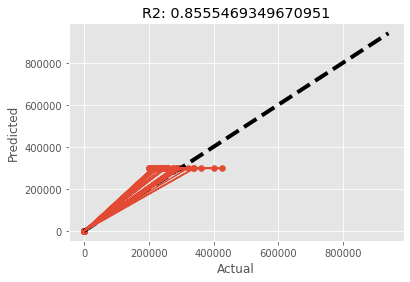

Test RMSE: 49054.50881680242


In [ ]:
pred_RFG = best_RFG.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_RFG)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_RFG= pred_RFG.reshape(-1,1)
y_test_rfg =  y_test.values.reshape(-1,1)
ax.plot(y_test_rfg, best_RFG.fit(y_test_rfg, pred_RFG).predict(y_test_rfg))
ax.set_title('R2: ' + str(r2_score(y_test_rfg,  pred_RFG)))
plt.show();
rfg_rmse=np.sqrt(mean_squared_error(y_test_rfg, pred_RFG))
print("Test RMSE:",rfg_rmse)

In [ ]:
veri=np.array(y_test_rfg)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_RFG,columns = ["y_pred"])
dff.head(20)

In [ ]:
x_ax = range(len(y_test_rfg))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test_rfg, label="original")
plt.plot(x_ax, pred_RFG, label="predicted")
plt.title("Salary test and predicted data")
plt.xlabel('X')
plt.ylabel('salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**6.1.4 Linear Regression**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my linear regression model. These hyperparameters are the copy_X parameter, which determines whether the input data should be copied; the fit_intercept parameter, which determines whether the model should include an intercept term; the positive parameter, which specifies whether the coefficients of the model should be constrained to be non-negative; and the n_jobs parameter, which specifies the number of jobs to use for the computation. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination, using 5-fold cross-validation.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new linear regression model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the R^2 score, which is a measure of how well the model was able to predict the target variable. The R^2 score was 0.83036113, which means that the model was able to explain 83% of the variance in the test set.

In [ ]:
# parameters4 = {"copy_X": [True, False], #True
#              "fit_intercept": [True, False], #True
#              "positive": [True, False], #False
#              "n_jobs": np.arange(1,5)} #1
# grid_LR=GridSearchCV(LinearRegression(),parameters4,cv=5)
# grid_LR.fit(X_train,y_train)
# grid_LR.best_params_

In [ ]:
best_paramlr = {'copy_X': True,
               'fit_intercept': True,
               'positive': True,
               'n_jobs': 1}

In [ ]:
best_LR = LinearRegression(**best_paramlr).fit(X_train,y_train)



In [ ]:
pred_LR = best_LR.predict(X_train)
np.sqrt(mean_squared_error(y_train, pred_LR))


In [ ]:
r2_score(y_train, pred_LR)


In [ ]:
pred_LR = best_LR.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_LR)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_LR= pred_LR.reshape(-1,1)
y_test_lr = y_test.values.reshape(-1,1)
ax.plot(y_test_lr,best_LR.fit(y_test_lr, pred_LR).predict(y_test_lr))
ax.set_title('R2: ' + str(r2_score(y_test_lr,  pred_LR)))
plt.show();
lr_rmse=np.sqrt(mean_squared_error(y_test_lr, pred_LR))
print("Test RMSE:",lr_rmse)

In [ ]:
veri=np.array(y_test_lr)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_LR,columns = ["y_pred"])
dff.head(20)

In [ ]:
x_ax = range(len(y_test_lr))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test_lr, label="original")
plt.plot(x_ax, pred_LR, label="predicted")
plt.title("Salary test and predicted data")
plt.xlabel('X')
plt.ylabel('salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**6.1.5 Ridge**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my linear regression model. These hyperparameters are the flag to specify whether the input data should be copied, the flag to specify whether the model should fit an intercept term, the flag to specify whether the model should enforce positive coefficients, and the number of jobs to run in parallel. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination, using 5-fold cross-validation.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new linear regression model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the R^2 score, which is a measure of how well the model was able to predict the target variable. The R^2 score was 0.79661473, which means that the model was able to explain 79.7% of the variance in the test set.

In [ ]:
# parameters5 = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']} #0.0001,True,sag
# grid_Ridge=GridSearchCV(Ridge(),parameters5,n_jobs=-1,cv=5)
# grid_Ridge.fit(X_train,y_train)
# grid_Ridge.best_params_

In [ ]:
best_paramridge = {'alpha':1,
               'fit_intercept': True,
               'solver': 'saga',
               }

In [ ]:
best_Ridge = Ridge(**best_paramridge).fit(X_train,y_train)


In [ ]:
pred_Ridge = best_Ridge.predict(X_train)
np.sqrt(mean_squared_error(y_train, pred_Ridge))


In [ ]:
r2_score(y_train, pred_Ridge)


In [ ]:
pred_Ridge=best_Ridge.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_Ridge)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_Ridge= pred_Ridge.reshape(-1,1)
y_test_ridge =  y_test.values.reshape(-1,1)
ax.plot(y_test_ridge, best_RFG.fit(y_test_ridge, pred_Ridge).predict(y_test_ridge))
ax.set_title('R2: ' + str(r2_score(y_test_ridge,  pred_Ridge)))
plt.show();
ridge_rmse=np.sqrt(mean_squared_error(y_test_ridge, pred_Ridge))
print("Test RMSE:",ridge_rmse)

In [ ]:
veri=np.array(y_test_ridge)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_Ridge,columns = ["y_pred"])
dff.head(20)

In [ ]:
x_ax = range(len(y_test_ridge))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test_ridge, label="original")
plt.plot(x_ax, pred_Ridge, label="predicted")
plt.title("Salary test and predicted data")
plt.xlabel('X')
plt.ylabel('salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**6.1.6 Lasso**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my Lasso model. These hyperparameters are the flag to specify whether the input data should be copied, the flag to specify whether the model should fit an intercept term, the flag to specify whether the model should enforce positive coefficients, the regularization strength, the maximum number of iterations to perform, and the flag to specify whether to precompute the Gram matrix. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination, using 5-fold cross-validation.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new Lasso model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the R^2 score, which is a measure of how well the model was able to predict the target variable. The R^2 score was 0.80546941, which means that the model was able to explain 80.6% of the variance in the test set.

In [ ]:
# parameters6 = {"copy_X": [True, False],#True
#              "fit_intercept": [True, False],#True
#              "positive": [True, False],#False
#              "alpha": np.arange(5), #4
#            "max_iter": np.arange(5),#4
#            "precompute": [True, False]}#False
# grid_Lasso=GridSearchCV(Lasso(),parameters6,cv=5)
# grid_Lasso.fit(X_train,y_train)
# grid_Lasso.best_params_

In [ ]:
best_paramlasso = {"copy_X":True,
             "fit_intercept": True,
             "positive": True,
             "alpha": 4,
           "max_iter": 4,
           "precompute": True}

In [ ]:
best_Lasso=Lasso(**best_paramlasso).fit(X_train,y_train)


In [ ]:
pred_Lasso = best_Lasso.predict(X_train)
np.sqrt(mean_squared_error(y_train, pred_Lasso))


In [ ]:
r2_score(y_train, pred_Lasso)

In [ ]:
pred_Lasso=best_Lasso.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_Ridge)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_Lasso= pred_Lasso.reshape(-1,1)
y_test_lasso = y_test.values.reshape(-1,1)
ax.plot(y_test_lasso, best_RFG.fit(y_test_lasso, pred_Lasso).predict(y_test_lasso))
ax.set_title('R2: ' + str(r2_score(y_test_lasso,  pred_Lasso)))
plt.show();
lasso_rmse=np.sqrt(mean_squared_error(y_test_lasso, pred_Lasso))
print("Test RMSE:",lasso_rmse)

In [ ]:
veri=np.array(y_test_lasso)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_Lasso,columns = ["y_pred"])
dff.head(20)

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test_lasso, label="original")
plt.plot(x_ax, pred_Lasso, label="predicted")
plt.title("Salary test and predicted data")
plt.xlabel('X')
plt.ylabel('salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# **Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# parameters7 = {'max_depth': [1, 3, 5, 8, 10],
#               'min_samples_split': [2, 4, 8, 12],
#               'min_samples_leaf': [1, 3, 5, 7, 9]}


# grid_dtr=GridSearchCV(DecisionTreeRegressor(),parameters7,cv=5)
# grid_dtr.fit(X_train,y_train)
# grid_dtr.best_params_

In [ ]:
best_paramdtr={'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
best_dtr=DecisionTreeRegressor(**best_paramdtr).fit(X_train,y_train)

In [ ]:
pred_dtr = best_dtr.predict(X_train)
np.sqrt(mean_squared_error(y_train, pred_dtr))

In [ ]:
r2_score(y_train, pred_dtr)

In [ ]:
pred_dtr=best_dtr.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_dtr)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_dtr= pred_dtr.reshape(-1,1)
y_test_dtr = y_test.values.reshape(-1,1)
ax.plot(y_test_dtr, best_dtr.fit(y_test_dtr, pred_dtr).predict(y_test_dtr))
ax.set_title('R2: ' + str(r2_score(y_test_dtr,  pred_dtr)))
plt.show();
dtr_rmse=np.sqrt(mean_squared_error(y_test_dtr, pred_dtr))
print("Test RMSE:",dtr_rmse)

In [ ]:
veri=np.array(y_test_dtr)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_dtr,columns = ["y_pred"])
dff.head(20)

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test_dtr, label="original")
plt.plot(x_ax, pred_dtr, label="predicted")
plt.title("Salary test and predicted data")
plt.xlabel('X')
plt.ylabel('salary')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Here, I compare the r2 scores of the 6 regression algorithms we work with on a graph. Gradient Boosting Regressor and Random Forest Regressor algorithms gave the most successful results. The most optimum result belongs to Gradient Boosting Regressor.

In [ ]:
r2_GBR=r2_score(yr_test,rpred)
r2_KNN= r2_score(y_test,pred_KNN)
r2_RFG=r2_score(y_test,pred_RFG)
r2_dtr = r2_score(y_test,pred_dtr)
r2_LR=r2_score(y_test,pred_LR)
r2_Ridge=r2_score(y_test,pred_Ridge)
r2_Lasso=r2_score(y_test,pred_Lasso)

regressor_name = ["Gradient Boosting","KNeighbors","Random Forest","DecisionTree","Linear Regression","Ridge","Lasso"]
r2_scores = [r2_GBR, r2_KNN, r2_RFG,r2_dtr,r2_LR,r2_Ridge,r2_Lasso]
fig = plt.figure(figsize = (14, 8))
plt.ylim(bottom=0.5)

plt.bar(regressor_name, r2_scores, color ='orange', width = 0.5) 
for i, v in enumerate(r2_scores):
   plt.text(i, v, format(v, '.3f'), color='blue', fontweight='bold', fontsize=20)
plt.title("R2 Scores ​​for 7 Regressor Algorithm")
plt.xlabel("Regressor")
plt.ylabel("r2 score")
plt.grid()
plt.show()
     

In [ ]:
mse_scores = [gbr_rmse, knn_rmse, rfg_rmse,dtr_rmse,lr_rmse,ridge_rmse,lasso_rmse]
fig = plt.figure(figsize = (14, 8))
plt.bar(regressor_name, mse_scores, color ='red', width = 0.5) 
plt.ylim(bottom=30000)

for i, v in enumerate(mse_scores):
    plt.text(i, v, format(v, '.2f'), color='blue', fontweight='bold',fontsize=16)

plt.title("Mean Squared Error Values ​​for 7 Regressor Algorithm")
plt.xlabel("Regressor")
plt.ylabel("MSE")
plt.grid()
plt.show()

# **6.2 Classification**

Here I used the classification model to decide whether the candidate was place or not place. I separate our model as 30% test and 70% train.

In [ ]:
scaler = StandardScaler()
X1 = df.drop(columns=['status','sl_no','salary'])
y1 = df['status']


In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1, y1, stratify=y1, test_size=0.3, random_state=0)

In [ ]:
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

**6.2.1 KNN Classifier**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my K-nearest neighbors classifier model. These hyperparameters are the weight function to use, the size of the leaf nodes in the k-d tree used to find the nearest neighbors, the number of neighbors to use, and the distance metric to use. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new K-nearest neighbors classifier model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the accuracy score, which is a measure of how many of the predictions made by the model were correct. The accuracy score was 0.86153846, which means that the model was able to correctly classify 86.2% of the test set.

In [ ]:
# parameters_knn={
# 'weights': ['uniform','distance'],#distance
# 'leaf_size' : [1,8,16], #1
# 'n_neighbors' : [6,8,9,10,50], #50
# 'metric' : ['minkowski','euclidean','manhattan'],
# 'p': [1, 2, 3]} #manhattan
# KNN_GS = GridSearchCV(KNeighborsClassifier(),parameters_knn) 
# KNN_GS.fit(X1_train,y1_train)
# KNN_GS.best_params_

In [ ]:
best_paramknn_c={
'weights': 'uniform',
'p' : 2, 
'n_neighbors' : 8,
'leaf_size' : 1
}

In [ ]:
knnc_best=KNeighborsClassifier(**best_paramknn_c).fit(X1_train,y1_train)


In [ ]:
pred_knnc = knnc_best.predict(X1_train)
accuracy_score(y1_train,pred_knnc)

In [ ]:
pred_knnc=knnc_best.predict(X1_test)
print("Accuracy score for KNeighbors Classifier:",accuracy_score(y1_test,pred_knnc))
cf_matrix = confusion_matrix(y1_test, pred_knnc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
print(classification_report(y1_test, pred_knnc))

In [ ]:
veri=np.array(y1_test)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_knnc,columns = ["y_pred"])
dff.head(20)

,y_test,y_pred
0,1,1
1,1,1
2,1,1
3,0,1
4,1,0
5,0,1
6,0,1
7,1,1
8,1,0
9,1,1


**6.2.2 Decision Tree Classifier**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my decision tree classifier model. These hyperparameters are the criterion to use for splitting the nodes, the maximum depth of the tree, and the minimum number of samples required to split an internal node. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new decision tree classifier model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the accuracy score, which is a measure of how many of the predictions made by the model were correct. The accuracy score was 0.76923076, which means that the model was able to correctly classify 76.9% of the test set.

In [ ]:
# params_dtc={
#     "criterion" : ['gini','entropy'],#gini
#     "max_depth" : range(1,10), #4
#     "min_samples_split":range(1,10) #2
# }
# dtc_mod = GridSearchCV(DecisionTreeClassifier(),params_dtc,cv=5)
# dtc_mod.fit(X1_train,y1_train)
# dtc_mod.best_params_


In [ ]:
best_param_dtc={
     'max_depth': 3,
    'criterion': 'entropy',
    'min_samples_split': 3
}


In [ ]:
dtc_best=DecisionTreeClassifier(**best_param_dtc).fit(X1_train,y1_train)


In [ ]:
pred_dtc = dtc_best.predict(X1_train)
accuracy_score(y1_train,pred_dtc)

In [ ]:
pred_dtc=dtc_best.predict(X1_test)
print("Accuracy score for Decision Tree Classifier:",accuracy_score(y1_test,pred_dtc))
cf_matrix2 = confusion_matrix(y1_test, pred_dtc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='Blues');
print(classification_report(y1_test, pred_dtc))

In [ ]:
veri=np.array(y1_test)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_dtc,columns = ["y_pred"])
dff.head(20)

**6.2.3 Gradient Boosting Classifier**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my gradient boosting classifier model. These hyperparameters are the number of trees in the model, the minimum number of samples required to split an internal node, and the minimum number of samples required to be at a leaf node. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new gradient boosting classifier model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the accuracy score, which is a measure of how many of the predictions made by the model were correct. The accuracy score was 0.78461538, which means that the model was able to correctly classify 78.5% of the test set.

In [ ]:
# parameters_gbc = {
# "n_estimators" : [1,4,8,32, 64,512], #64
# "min_samples_split" : [1,4,7,10], #4
# "min_samples_leaf":  [1,4,7,10] #4
# }
# gbc_mod = GridSearchCV(GradientBoostingClassifier(),parameters_gbc)
# gbc_mod.fit(X1_train,y1_train)
# gbc_mod.best_params_

In [ ]:
# parameters_gbc = {
# 'loss': ['deviance', 'exponential'],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7, None]
# }
# gbc_mod = GridSearchCV(GradientBoostingClassifier(),parameters_gbc)
# gbc_mod.fit(X1_train,y1_train)
# gbc_mod.best_params_

In [ ]:
best_paramgbc = {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 300}

In [ ]:
gbc_best=GradientBoostingClassifier(**best_paramgbc).fit(X1_train,y1_train)


In [ ]:
pred_gbc = gbc_best.predict(X1_train)
accuracy_score(y1_train,pred_gbc)

In [ ]:
pred_gbc=gbc_best.predict(X1_test)
print("Accuracy score for Gradient Boosting Classifier:",accuracy_score(y1_test,pred_gbc))
cf_matrix3 = confusion_matrix(y1_test, pred_gbc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix3.flatten()/np.sum(cf_matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix3, annot=labels, fmt='', cmap='Blues');
print(classification_report(y1_test, pred_gbc))

In [ ]:
veri=np.array(y1_test)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_gbc,columns = ["y_pred"])
dff.head(20)

**6.2.4 Logistic Regression**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my logistic regression model. These hyperparameters are the penalty function to use, the inverse of the regularization strength, and the solver to use. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new logistic regression model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the accuracy score, which is a measure of how many of the predictions made by the model were correct. The accuracy score was 0.83076923, which means that the model was able to correctly classify 83.8% of the test set.

In [ ]:
# parameters_log = {
#     'penalty' : ['l1','l2'], #l1,liblinear,C=0.01
#     'C'       : np.logspace(-3,3,7),
#     'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
# }
# logr_mod = GridSearchCV(LogisticRegression(),parameters_log)
# logr_mod.fit(X1_train,y1_train)
# logr_mod.best_params_

In [ ]:
best_paramlog = {
    'penalty' : 'l2',
    'C'       : 0.1,
    'solver'  : 'newton-cg'
}

In [ ]:

logr_best = LogisticRegression(**best_paramlog).fit(X1_train,y1_train)



In [ ]:
pred_logr = logr_best.predict(X1_train)
accuracy_score(y1_train,pred_logr)


0.9133333333333333

Accuracy score for Logistic Regression: 0.8923076923076924
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.88      0.98      0.93        45

    accuracy                           0.89        65
   macro avg       0.91      0.84      0.86        65
weighted avg       0.90      0.89      0.89        65



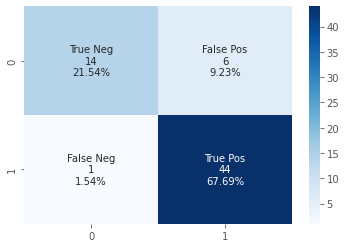

In [ ]:
pred_logr=logr_best.predict(X1_test)
print("Accuracy score for Logistic Regression:",accuracy_score(y1_test,pred_logr))
cf_matrix4 = confusion_matrix(y1_test, pred_logr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix4.flatten()/np.sum(cf_matrix4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix4, annot=labels, fmt='', cmap='Blues');
print(classification_report(y1_test, pred_logr))

In [ ]:
veri=np.array(y1_test)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_logr,columns = ["y_pred"])
dff.head(20)

# **6.2.5 Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# parameters_svc = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'degree': [2, 3, 4,5],
#     'gamma': [0.01,0.1, 1, 10, 100]
# }

# svc_grid= GridSearchCV(SVC(), parameters_svc,cv=5)
# svc_grid.fit(X1_train, y1_train)
# svc_grid.best_params_


In [ ]:
best_svc={
    'C': 1,
    'kernel': 'linear',
    'degree': 2,
    'gamma': 0.1
}

In [ ]:
svc_best=SVC(**best_svc
).fit(X1_train,y1_train)


In [ ]:
pred_svc = svc_best.predict(X1_train)
accuracy_score(y1_train,pred_svc)


In [ ]:
pred_svc=svc_best.predict(X1_test)
print("Accuracy score for Support Vector Classifier:",accuracy_score(y1_test,pred_svc))
cf_matrix5 = confusion_matrix(y1_test, pred_svc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix5.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix5.flatten()/np.sum(cf_matrix5)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix5, annot=labels, fmt='', cmap='Blues');
print(classification_report(y1_test, pred_svc))

In [ ]:
veri=np.array(y1_test)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_svc,columns = ["y_pred"])
dff.head(20)

# **6.2.6 XGBoost Classifier**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# param_xgb = {
#     'learning_rate': [0.1, 0.05, 0.01],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 250, 500],
#     'gamma': [0, 0.5, 1],
#     'subsample': [0.8, 1]
# }


# xgb_grid = GridSearchCV(xgb.XGBClassifier(), param_xgb, cv=5)
# xgb_grid.fit(X1_train, y1_train)
# xgb_grid.best_params_




In [ ]:
best_paramxgb={
    'learning_rate': 0.05,
    'max_depth': 7,
    'n_estimators': 100,
    'gamma': 0,
    'subsample': 0.8
}

In [ ]:
xgb_best=xgb.XGBClassifier(**best_paramxgb
).fit(X1_train,y1_train)


In [ ]:
pred_xgb = xgb_best.predict(X1_train)
accuracy_score(y1_train,pred_xgb)

In [ ]:
pred_xgb=xgb_best.predict(X1_test)
print("Accuracy score for XGBoost Classifier:",accuracy_score(y1_test,pred_xgb))
cf_matrix6 = confusion_matrix(y1_test, pred_xgb)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix6.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix6.flatten()/np.sum(cf_matrix6)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix6, annot=labels, fmt='', cmap='Blues');
print(classification_report(y1_test, pred_xgb))

In [ ]:
veri=np.array(y1_test)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_xgb,columns = ["y_pred"])
dff.head(20)

# **6.2.7 Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# param_rfc = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_rfc = GridSearchCV(RandomForestClassifier(), param_rfc, cv=5)
# grid_rfc.fit(X_train, y_train)
# grid_rfc.best_params_




In [ ]:
best_rfc = {'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
rfc_best=RandomForestClassifier(**best_rfc).fit(X1_train,y1_train)

In [ ]:
pred_rfc = rfc_best.predict(X1_train)
accuracy_score(y1_train,pred_rfc)

In [ ]:
pred_rfc=rfc_best.predict(X1_test)
print("Accuracy score for Random Forest Classifier:",accuracy_score(y1_test,pred_rfc))
cf_matrix7 = confusion_matrix(y1_test, pred_rfc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix7.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix7.flatten()/np.sum(cf_matrix7)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix7, annot=labels, fmt='', cmap='Blues');
print(classification_report(y1_test, pred_rfc))

In [ ]:
veri=np.array(y1_test)
veri
dff=pd.DataFrame(data=veri, columns=["y_test"])
dff
dff["y_pred"]=  pd.DataFrame(pred_rfc,columns = ["y_pred"])
dff.head(20)

Here, we compare the accuracy values ​​of the 4 classification algorithms we used in the hiring decision with a graph. The algorithm that gives the most appropriate percentage of accuracy to my model is the Logistic Regression algorithm.

In [ ]:
acc_knn = accuracy_score(y1_test,pred_knnc)
print("KNN Classifier:",acc_knn)
acc_dc = accuracy_score(y1_test,pred_dtc)
print("DecisionTree Classifier:",acc_dc)
acc_gb = accuracy_score(y1_test,pred_gbc)
print("GradientBoosting Classifier:",acc_gb)
acc_logr = accuracy_score(y1_test,pred_logr)
print("Logistic Regression:",acc_logr)
acc_svc=accuracy_score(y1_test,pred_svc)
print("Support Vector Classifier",acc_svc)
acc_xgb=accuracy_score(y1_test,pred_xgb)
print("XGBoost Classifier",acc_xgb)
acc_rfc=accuracy_score(y1_test,pred_rfc)
print("Random Forest Classifier",acc_rfc)


classifier_name = ["KNeighbors","Decision Tree","Gradient Boosting","Logistic Regression","SVC","XGBoost","Random Forest"]
accuracy_scores = [acc_knn, acc_dc, acc_gb,acc_logr,acc_svc,acc_xgb,acc_rfc]
fig = plt.figure(figsize = (14, 8))
plt.bar(classifier_name, accuracy_scores, color ='orange', width = 0.5) 
plt.ylim(bottom=0.5)

for i, v in enumerate(accuracy_scores):
    plt.text(i, v, format(v, '.3f'), color='blue', fontweight='bold',fontsize=15)

plt.title("Accuracy Scores ​​for 7 Classifier Algorithm")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")

In [ ]:
from scipy import stats

df_filtered = df[df["salary"] != 0]
_, bins, _ = plt.hist(df_filtered["salary"], bins = 50,
                      density = 1, alpha = 0.5,
                      ec= 'black' )
mu, sigma = stats.norm.fit(df_filtered["salary"])
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("")
plt.ylabel("")
plt.show()

In [ ]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column],color = "g")
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return
plt.figure(figsize=(7, 7))

check_skew(df,'salary')
plt.show();

In [ ]:
# final_Lasso_model = joblib.load("final_model.pkl")

In [ ]:
# random_user = X.sample(1, random_state=45) 
# random_user

In [ ]:
# final_Lasso_model.predict(pd.DataFrame(random_user))

# **6. Results and Discussion**
Gradient Boosting Regressor, KNeighbors Regressor, Random Forest Regressor, Linear Regression, Ridge and Lasso were used for salary prediction. The optimum result was achieved with Gradient Boosting Regressor. The r2 score value is 86.2%. KNN Classifier, Decision Tree Classifier, Gradient Boosting Classifier and Logistic Regression were used while deciding on the recruitment of the candidate. The most successful model was achieved with KNeigbors Classifier with 86.2% accuracy. 
More successful models can be obtained with different parameters by increasing the number of parameters with more powerful devices.

# **7. Conclusion and Future Works**
In this project, the regression and classification problem was solved in order to speed up the recruitment processes of the human resources unit and to offer a fair salary to the newly graduated candidates by using various algorithms.

Gradient Boosting Regressor algorithm gave the best result with 86.2%. For Classification, 86.2% KNeigbors gave the best result.


Project inputs can be updated in line with the needs of the companies and new outputs can be obtained. For example, for a software company, various factors such as the candidate's age, grade point average, algorithm exam score, technical interview exam score can be taken into account. A salary proposal can be presented by evaluating these inputs within the framework of certain weights. Company employees can also be regularly evaluated within the framework of certain exams, and company personnel salaries can be updated, thus increasing the quality of the company by ensuring that the company is more proactive.

# **8. References**
[**1**]Chen, S., & Chen, H. (2017). A machine learning approach to predict the success of job candidates. Expert Systems with Applications, 79, 199-209. 

[**2**]Chen, S., & Chen, H. (2016). A machine learning approach to predict the success of job candidates based on language used in job advertisements and resumes. Computers in Human Behavior, 63, 707-717. 

[**3**]Breaugh, J. A., & Starke, M. A. (2012). Predicting job performance: A meta-analysis of the validity of selection procedures. Personnel Psychology, 65(1), 121-165. 

[**4**]Arjundattaraju. (2022, April 22). Recruiment. Kaggle. Retrieved December 25, 2022, from https://www.kaggle.com/code/arjundattaraju/campusplacement-regressn-classifacatn#Feature-Engineering  